# Day 16: Chronal Classification

In [16]:
def addr(a,b,c,reg):
    '''(add register) stores into register C the result of adding register A and register B.'''
    reg[c] = reg[a] + reg[b]
    return reg

def addi(a,b,c,reg):
    '''(add immediate) stores into register C the result of adding register A and value B.'''
    reg[c] = reg[a] + b
    return reg

def mulr(a,b,c,reg):
    '''(multiply register) stores into register C the result of multiplying register A and register B.'''
    reg[c] = reg[a] * reg[b]
    return reg
    
def muli(a,b,c,reg):
    '''muli (multiply immediate) stores into register C the result of multiplying register A and value B.'''
    reg[c] = reg[a] * b
    return reg

def banr(a,b,c,reg):
    '''(bitwise AND register) stores into register C the result of the bitwise AND of register A and register B.'''
    reg[c] = reg[a] & reg[b]
    return reg

def bani(a,b,c,reg):
    '''(bitwise AND immediate) stores into register C the result of the bitwise AND of register A and value B.'''
    reg[c] = reg[a] & b
    return reg
    
def borr(a,b,c,reg):
    ''' (bitwise OR register) stores into register C the result of the bitwise OR of register A and register B.'''
    reg[c] = reg[a] | reg[b]
    return reg

def bori(a,b,c,reg):
    ''' (bitwise OR immediate) stores into register C the result of the bitwise OR of register A and value B.'''
    reg[c] = reg[a] | b
    return reg

def setr(a,b,c,reg):
    ''' (set register) copies the contents of register A into register C. (Input B is ignored.)'''
    reg[c] = reg[a]
    return reg
    
def seti(a,b,c,reg):
    ''' (set immediate) stores value A into register C. (Input B is ignored.)'''
    reg[c] = a
    return reg

def gtir(a,b,c,reg):
    ''' (greater-than immediate/register) sets register C to 1 if value A is greater than register B. Otherwise, register C is set to 0.'''
    if a>reg[b]:
        reg[c]=1
    else:
        reg[c]=0
    return reg
    
def gtri(a,b,c,reg):
    ''' (greater-than register/immediate) sets register C to 1 if register A is greater than value B. Otherwise, register C is set to 0.'''
    if reg[a]>b:
        reg[c]=1
    else:
        reg[c]=0
    return reg

def gtrr(a,b,c,reg):
    ''' (greater-than register/register) sets register C to 1 if register A is greater than register B. Otherwise, register C is set to 0.'''
    if reg[a]>reg[b]:
        reg[c]=1
    else:
        reg[c]=0
    return reg
    
def eqir (a,b,c,reg):
    '''(equal immediate/register) sets register C to 1 if value A is equal to register B. Otherwise, register C is set to 0.'''
    if a==reg[b]:
        reg[c]=1
    else:
        reg[c]=0
    return reg

def eqri(a,b,c,reg):
    ''' (equal register/immediate) sets register C to 1 if register A is equal to value B. Otherwise, register C is set to 0.'''
    if reg[a]==b:
        reg[c]=1
    else:
        reg[c]=0
    return reg

def eqrr(a,b,c,reg):
    ''' (equal register/register) sets register C to 1 if register A is equal to register B. Otherwise, register C is set to 0.'''
    if reg[a]==reg[b]:
        reg[c]=1
    else:
        reg[c]=0
    return reg

def opcode(i,a,b,c,reg):
    if   i==0: return addr(a,b,c,reg)
    elif i==1: return addi(a,b,c,reg)
    elif i==2: return mulr(a,b,c,reg)
    elif i==3: return muli(a,b,c,reg)
    elif i==4: return banr(a,b,c,reg)
    elif i==5: return bani(a,b,c,reg)
    elif i==6: return borr(a,b,c,reg)
    elif i==7: return bori(a,b,c,reg)
    elif i==8: return setr(a,b,c,reg)
    elif i==9: return seti(a,b,c,reg)
    elif i==10: return gtir(a,b,c,reg)
    elif i==11: return gtri(a,b,c,reg)
    elif i==12: return gtrr(a,b,c,reg)
    elif i==13: return eqir(a,b,c,reg)
    elif i==14: return eqri(a,b,c,reg)
    elif i==15: return eqrr(a,b,c,reg) 

## Part 1

Testing all test codes with the 16 opcodes, counting how many gives a compatible register.

Also filling a 3D correlation matrix to be used fpr Part 2.

In [112]:
from copy import deepcopy
import numpy as np

with open("data/input16_opc.txt") as f:
    testcodes = [[ l.strip("\n") for l in ll.split("\n") ] for ll in f.read().split("\n\n") ]

co_gt_3 = 0

corr3D = np.zeros((len(testcodes),16,16),dtype=int)
it = 0

for t in testcodes:
    
    reg = [ int(d) for d in t[0].replace("Before: [","").replace("]","").split(", ")]
    regaft = [ int(d) for d in t[2].replace("After:  [","").replace("]","").split(", ")]
    op = [ int(d) for d in t[1].split(" ") ]
        
    o = op[0]
    a = op[1]
    b = op[2]
    c = op[3]

    co = 0
    for i in range(16):
        regin = deepcopy(reg)
        if regaft == opcode(i,a,b,c,regin):
            co+=1
            corr3D[it][o][i] = 1
    if co >=3:
        co_gt_3 += 1
    it += 1

print(co_gt_3)

547


## Part 2

Reduce correlation matrix by "and-ing" all results from the testcodes. Result is a 16x16 matrix correlating the opcode number and the index in my implementation (would certainly not be solved yet, but I expect at lest one opcode with a single correspondence, to be used to further reduce the matrix).

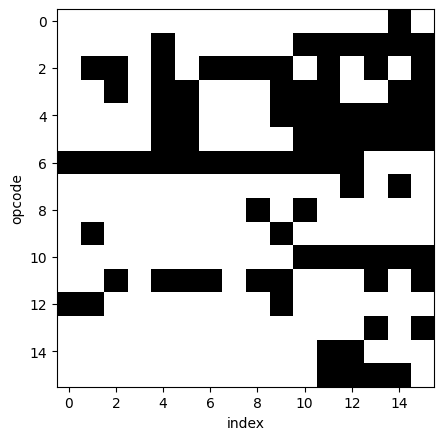

In [137]:
corrand = np.ones((16,16),dtype=int)

for c in corr3D:
    for o in range(16):
        if sum(c[o])>0:
            for i in range(16):
                corrand[o][i] = corrand[o][i] and c[o][i]
                
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5),dpi=100)
plt.imshow(corrand,cmap="binary")
ax.set_ylabel('opcode')
ax.set_xlabel('index')
plt.show()

There's indeed one opcode where opcode-index relationship is solved (opcode 0 - index 14). I'll start from there to iteratively filter the ther rows.

opcode  0 = index 14
opcode  1 = index  4
opcode  2 = index  7
opcode  3 = index  2
opcode  4 = index  9
opcode  5 = index  5
opcode  6 = index  3
opcode  7 = index 12
opcode  8 = index  8
opcode  9 = index  1
opcode 10 = index 10
opcode 11 = index  6
opcode 12 = index  0
opcode 13 = index 15
opcode 14 = index 11
opcode 15 = index 13


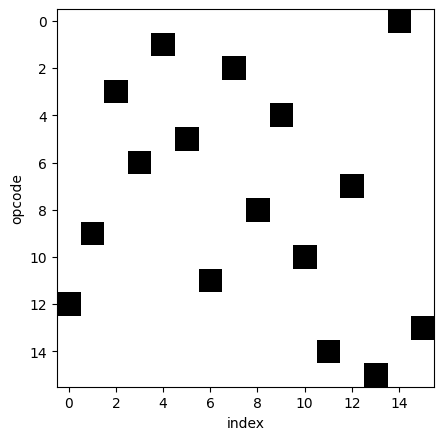

In [132]:
passed = [] # list of processed row that have been filter to single correspondence
while True:
    unique = [ n.sum() for n in corrand ] # count how many opcode-index correspondences I have in a given row
    uu = [i for i, e in enumerate(unique) if e == 1] # select rows where correspondence is unique
    for u in uu:
        if u in passed:
            continue
        else:
            mask = corrand[u]
            for i in range(len(corrand)):
                if i==u:
                    continue
                else:
                    b = corrand[i]
                    masked = [ bb and not mm for bb,mm in zip(b,mask)]
                    corrand[i] = masked
            passed.append(u)
    if len(passed) == len(corrand):
        break

corr = {}
c = np.where(corrand==1)
for o,i in zip(c[0],c[1]):
    print("opcode {:2d} = index {:2d}".format(o,i))
    corr[o] = i

fig, ax = plt.subplots(figsize=(5,5),dpi=100)
plt.imshow(corrand,cmap="binary")
ax.set_ylabel('opcode')
ax.set_xlabel('index')
plt.show()

Next step is implementing the virtual machine to run the program, easy given the previous `opcode` function and `corr` dictionary...

In [151]:
def executeProg(prog,corr):
    # it says nothing about the initial value of the registers, assuming 0
    reg = [0,0,0,0]
    
    for o,a,b,c in prog:
        reg = opcode(corr[o],a,b,c,reg)
    
    return reg

In [152]:
with open("data/input16_prog.txt") as f:
    prog = [ [ int(d) for d in l.strip("\n").split(" ") ] for l in f.readlines() ]
    
reg = executeProg(prog,corr)
print(reg[0])

582
